In [62]:
import numpy as np
import pandas as pd
from scipy import stats
import pickle
# Plotting libraries
!pip install scikit-learn numpy
!pip install matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import tensorflow as tf
# Sklearn libraries
from scipy.stats import chi2_contingency
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import DBSCAN, KMeans
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
# Filter warnings
warnings.filterwarnings('ignore') #filter warnings
# Show plots inline
%matplotlib inline

In [64]:
df_gafgyt_benign = pd.read_csv(r"D:\DATASET\botnetdataset\1.benign.csv")
df_gafgyt_combo = pd.read_csv(r"D:\DATASET\botnetdataset\1.gafgyt.combo.csv")
df_gafgyt_junk = pd.read_csv(r"D:\DATASET\botnetdataset\1.gafgyt.junk.csv")
df_gafgyt_scan = pd.read_csv(r"D:\DATASET\botnetdataset\1.gafgyt.scan.csv")
df_gafgyt_tcp = pd.read_csv(r"D:\DATASET\botnetdataset\1.gafgyt.tcp.csv")
df_gafgyt_udp = pd.read_csv(r"D:\DATASET\botnetdataset\1.gafgyt.udp.csv")

df_mirai_benign = pd.read_csv(r"D:\DATASET\botnetdataset\2.benign.csv")
df_mirai_combo = pd.read_csv(r"D:\DATASET\botnetdataset\2.mirai.ack.csv")
df_mirai_scan = pd.read_csv(r"D:\DATASET\botnetdataset\2.mirai.scan.csv")
df_mirai_tcp = pd.read_csv(r"D:\DATASET\botnetdataset\2.mirai.udp.csv")
df_mirai_udp = pd.read_csv(r"D:\DATASET\botnetdataset\2.mirai.udpplain.csv")

In [65]:
df_gafgyt_benign['type'] = 'gafgyt benign'
df_gafgyt_combo['type'] = 'gafgyt combo'
df_gafgyt_junk['type'] = 'gafgyt junk'
df_gafgyt_scan['type'] = 'gafgyt scan'
df_gafgyt_tcp['type'] = 'gafgyt tcp'
df_gafgyt_udp['type'] = 'gafgyt udp'

df_mirai_benign['type'] = 'mirai benign'
df_mirai_combo['type'] = 'mirai combo'
df_mirai_scan['type'] = 'mirai scan'
df_mirai_tcp['type'] = 'mirai tcp'
df_mirai_udp['type'] = 'mirai udp'


In [66]:
df = pd.concat([df_gafgyt_benign, df_gafgyt_combo, df_gafgyt_junk, df_gafgyt_scan, df_gafgyt_tcp, df_gafgyt_udp, df_mirai_benign, df_mirai_combo, df_mirai_scan, df_mirai_tcp, df_mirai_udp], axis=0, sort=False, ignore_index=True)

In [67]:
df["type"].value_counts()

mirai tcp        151481
mirai combo      113285
gafgyt udp       105874
gafgyt tcp        92141
mirai udp         87368
gafgyt combo      59718
gafgyt benign     49548
mirai scan        43192
gafgyt scan       29849
gafgyt junk       29068
mirai benign      13113
Name: type, dtype: int64

In [68]:
df.head()

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,type
0,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.0,0.0,1.000000,60.000000,0.000000,60.000000,0.000000,0.0,0.0,gafgyt benign
1,1.000000,354.000000,0.000000,1.000000,354.000000,0.000000,1.000000,354.000000,0.000000,1.000000,...,0.0,0.0,5.319895,344.262695,4.710446,344.262695,22.188299,0.0,0.0,gafgyt benign
2,1.857879,360.458980,35.789338,1.912127,360.275733,35.923972,1.969807,360.091968,35.991542,1.996939,...,0.0,0.0,6.318264,347.703087,9.034660,347.703087,81.625077,0.0,0.0,gafgyt benign
3,1.000000,337.000000,0.000000,1.000000,337.000000,0.000000,1.000000,337.000000,0.000000,1.000000,...,0.0,0.0,1.000000,337.000000,0.000000,337.000000,0.000000,0.0,0.0,gafgyt benign
4,1.680223,172.140917,18487.448750,1.793580,182.560279,18928.175300,1.925828,193.165753,19153.795810,1.992323,...,0.0,0.0,1.000000,60.000000,0.000000,60.000000,0.000000,0.0,0.0,gafgyt benign


In [69]:
from sklearn.utils import shuffle

df = shuffle(df)

In [70]:
#shuffle rows of dataframe 
sampler=np.random.permutation(len(df))
data=df.take(sampler)
df.head()

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,type
100686,187.541371,74.020854,0.500059,295.509295,74.030518,0.731497,822.492744,74.039789,0.954003,7446.748780,...,0.000000e+00,0.0,1.677192,74.0,0.000000,95.268043,0.000000e+00,0.000000e+00,0.000000e+00,gafgyt combo
435747,147.424097,412.356870,54137.198712,229.725141,437.584955,48487.068817,629.416970,444.666250,46661.618728,6111.589748,...,0.000000e+00,0.0,1.000000,60.0,0.000000,60.000000,0.000000e+00,0.000000e+00,0.000000e+00,mirai combo
469176,160.627973,481.136773,35738.456316,249.558529,452.831494,44454.089414,671.648906,437.276951,48559.918756,6438.188380,...,0.000000e+00,0.0,1.000000,566.0,0.000000,566.000000,0.000000e+00,0.000000e+00,0.000000e+00,mirai combo
199377,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.000000e+00,0.0,1.000000,60.0,0.000000,60.000000,0.000000e+00,0.000000e+00,0.000000e+00,gafgyt tcp
14867,1.288245,89.497485,250.802816,1.474160,85.779494,315.046898,1.902519,82.683884,358.270469,6.082381,...,-8.490000e-43,0.0,5.285568,98.0,0.000002,138.592929,4.070000e-12,-3.970000e-29,-1.550000e-17,gafgyt benign


In [71]:
X = df.drop(['type'], axis=1)
y = df.filter(['type'])

In [72]:
# Compute Pearson correlation coefficients
corr_matrix = X.corr()

# Drop the upper triangular matrix elements to save memory
corr_triu = np.triu(corr_matrix, k=1)

# Select top 15 features with highest correlation coefficients
top_features = np.argsort(corr_triu.flatten())[-15:]

# Get the row and column indices of the top features
row_indices, col_indices = np.unravel_index(top_features, corr_triu.shape)

# Select the top features by indexing the correlation matrix
corr_top = corr_matrix.iloc[row_indices, col_indices]

# Drop all columns that are not selected by PCC
X_top = X.iloc[:, col_indices]

# Add target variable to new dataset with selected features
df_top = pd.concat([X_top, y], axis=1)

# Display new dataset with top 15 features
print("New dataset with top 15 features:")
print(df_top.head())

New dataset with top 15 features:
        H_L0.1_weight  H_L0.01_weight  H_L1_variance  H_L1_weight   H_L3_mean  \
100686    7446.748780    37230.632629       0.954003   822.492744   74.030518   
435747    6111.589748    40159.781290   46661.618728   629.416970  437.584955   
469176    6438.188380    49419.634123   48559.918756   671.648906  452.831494   
199377       1.000000        1.000000       0.000000     1.000000   60.000000   
14867        6.082381       32.842336     358.270469     1.902519   85.779494   

        H_L5_variance  HH_jit_L1_weight  HH_jit_L5_weight  H_L5_weight  \
100686       0.500059        821.129138        187.378414   187.541371   
435747   54137.198712          1.000000          1.000000   147.424097   
469176   35738.456316        500.774216        133.688064   160.627973   
199377       0.000000          1.000000          1.000000     1.000000   
14867      250.802816          1.779745          1.288245     1.288245   

         H_L5_mean  HH_jit_L3_weig

In [73]:
#list of PCC features:  [H_L1_variance,  H_L0.1_weight,  H_L0.01_weight,  H_L1_weight,  H_L3_variance, H_L5_mean,  H_L5_weight,  HH_jit_L1_weight,  HH_jit_L3_weight,  HH_jit_L5_weight,  HH_jit_L0.01_weight,  HH_jit_L0.1_weight,  H_L5_variance, H_L3_mean,  H_L3_weight, type]

In [74]:
# list of column names to keep
columns_to_keep = ['H_L1_variance', 'H_L0.1_weight', 'H_L0.01_weight', 'H_L1_weight', 'H_L3_variance', 
                   'H_L5_mean', 'H_L5_weight', 'HH_jit_L1_weight', 'HH_jit_L3_weight', 'HH_jit_L5_weight',
                   'HH_jit_L0.01_weight', 'HH_jit_L0.1_weight', 'H_L5_variance', 'H_L3_mean', 'H_L3_weight', 'type']

# select only the columns to keep and drop all others
df = df.loc[:, columns_to_keep]
df.head()

,H_L1_variance,H_L0.1_weight,H_L0.01_weight,H_L1_weight,H_L3_variance,H_L5_mean,H_L5_weight,HH_jit_L1_weight,HH_jit_L3_weight,HH_jit_L5_weight,HH_jit_L0.01_weight,HH_jit_L0.1_weight,H_L5_variance,H_L3_mean,H_L3_weight,type
100686,0.954003,7446.748780,37230.632629,822.492744,0.731497,74.020854,187.541371,821.129138,295.133532,187.378414,37122.876866,7429.371685,0.500059,74.030518,295.509295,gafgyt combo
435747,46661.618728,6111.589748,40159.781290,629.416970,48487.068817,412.356870,147.424097,1.000000,1.000000,1.000000,1.000000,1.000000,54137.198712,437.584955,229.725141,mirai combo
469176,48559.918756,6438.188380,49419.634123,671.648906,44454.089414,481.136773,160.627973,500.774216,193.741903,133.688064,36910.609092,4852.092458,35738.456316,452.831494,249.558529,mirai combo
199377,0.000000,1.000000,1.000000,1.000000,0.000000,60.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,60.000000,1.000000,gafgyt tcp
14867,358.270469,6.082381,32.842336,1.902519,315.046898,89.497485,1.288245,1.779745,1.474086,1.288245,12.520508,2.387312,250.802816,85.779494,1.474160,gafgyt benign


In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import time

               precision    recall  f1-score   support

gafgyt benign       1.00      1.00      1.00      9877
 gafgyt combo       1.00      1.00      1.00     11791
  gafgyt junk       1.00      1.00      1.00      5752
  gafgyt scan       1.00      1.00      1.00      6027
   gafgyt tcp       1.00      1.00      1.00     18303
   gafgyt udp       1.00      1.00      1.00     21170
 mirai benign       1.00      1.00      1.00      2667
  mirai combo       1.00      1.00      1.00     22629
   mirai scan       1.00      1.00      1.00      8563
    mirai tcp       1.00      1.00      1.00     30510
    mirai udp       1.00      1.00      1.00     17639

     accuracy                           1.00    154928
    macro avg       1.00      1.00      1.00    154928
 weighted avg       1.00      1.00      1.00    154928

Computational time: 256.48 seconds
[[ 9876     0     1     0     0     0     0     0     0     0     0]
 [    0 11790     1     0     0     0     0     0     0     0     0]

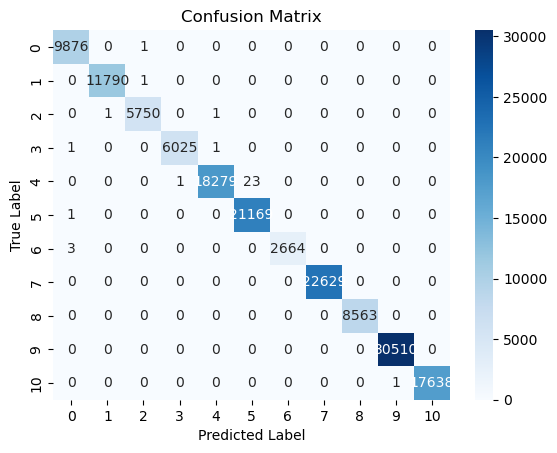

In [76]:
# Train the random forest classifier
# Train the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

start_time = time.time()
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
end_time = time.time()
computational_time =  end_time - start_time

# Evaluate the performance of the classifier on the testing set
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))
print(f'Computational time: {computational_time:.2f} seconds')

# Print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


# Plot the confusion matrix
#plot_confusion_matrix(rf, X_test, y_test)
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [81]:
!pip install tensorflow
tf.__version__


'2.11.0'

In [86]:
# Generate adversarial examples
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

# create a session
sess = tf.compat.v1.Session()

# Enable eager execution
tf.compat.v1.enable_eager_execution()
sess = tf.Session()
x = tf.placeholder(tf.float32, shape=(None, X_train.shape[1]))
y = tf.placeholder(tf.int64, shape=(None,))
logits = rf.predict_proba(x)
loss = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=y)
grads, = tf.gradients(loss, x)
adv_x = fast_gradient_method(x, grads, 0.1, np.inf)

# Evaluate the performance of the classifier on the adversarial examples
adv_x_np = sess.run(adv_x, feed_dict={x: X_test})
adv_y_pred = rf.predict(adv_x_np)
print(classification_report(y_test, adv_y_pred))
print(f'Computational time: {computational_time:.2f} seconds')

# Print the confusion matrix
cm = confusion_matrix(y_test, adv_y_pred)
print(cm)

# Plot the confusion matrix using seaborn heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

ValueError: tf.enable_eager_execution must be called at program startup.